<a href="https://colab.research.google.com/github/rayhanpratama0031/TugasPraktikum/blob/main/PRAK3/Perspektif_gbr3d_NIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

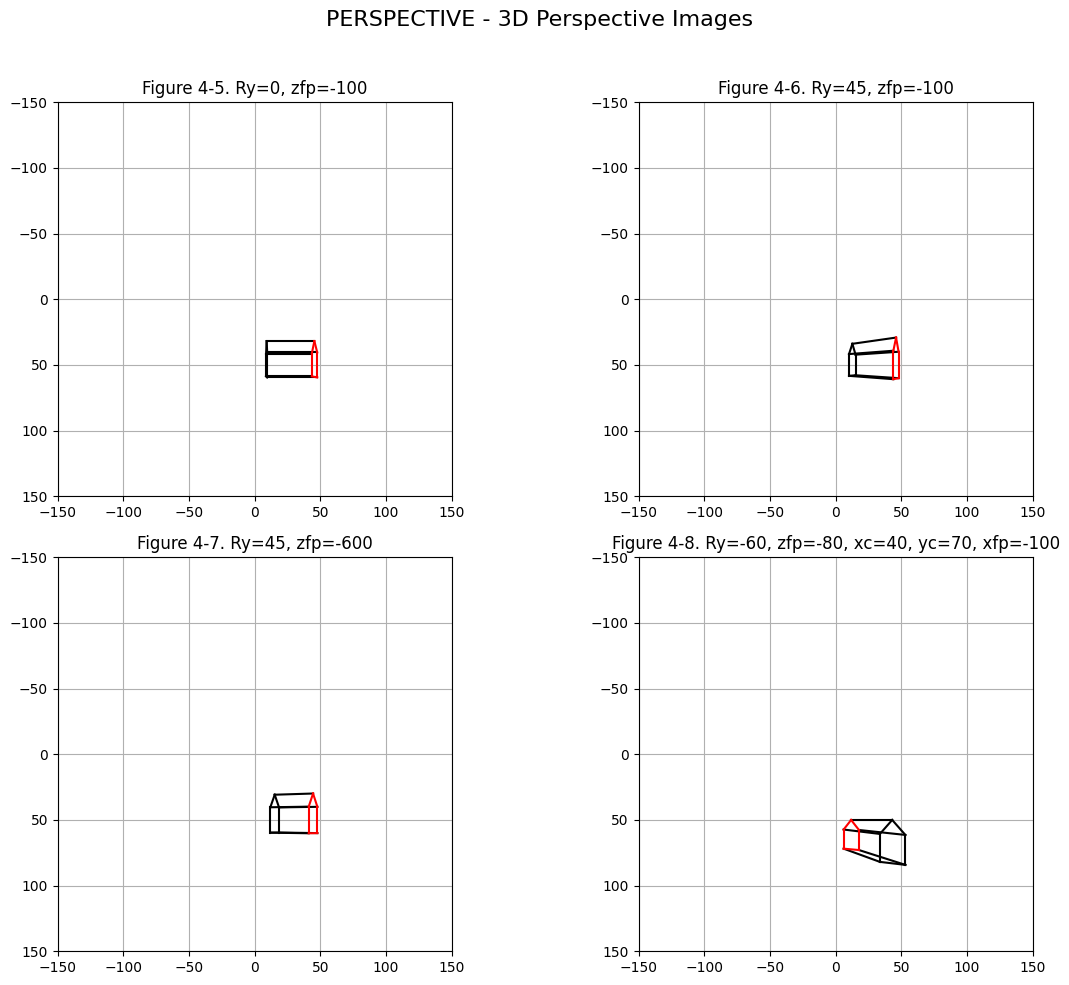

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, radians

plt.figure(figsize=(12, 10))
plt.suptitle('PERSPECTIVE - 3D Perspective Images', fontsize=16)

# Koordinat lokal objek (rumah)
x = [-20, -20, 20, 20, -20, -20, 20, 20, -20, 20]
y = [-10, -10, -10, -10, 10, 10, 10, 10, -20, -20]
z = [5, -5, -5, 5, 5, -5, -5, 5, 0, 0]

# Fungsi untuk menggambar rumah
def plothouse(x, y, color='k'):
    plt.plot([x[0], x[3]], [y[0], y[3]], color=color)  # Garis dasar
    plt.plot([x[1], x[2]], [y[1], y[2]], color=color)
    plt.plot([x[4], x[7]], [y[4], y[7]], color=color)  # Garis atap
    plt.plot([x[5], x[6]], [y[5], y[6]], color=color)
    plt.plot([x[8], x[9]], [y[8], y[9]], color=color)  # Garis dinding
    plt.plot([x[4], x[0]], [y[4], y[0]], color=color)  # Garis vertikal
    plt.plot([x[5], x[1]], [y[5], y[1]], color=color)
    plt.plot([x[6], x[2]], [y[6], y[2]], color='r')  # Garis merah
    plt.plot([x[7], x[3]], [y[7], y[3]], color='r')
    plt.plot([x[0], x[8]], [y[0], y[8]], color=color)  # Garis dinding
    plt.plot([x[1], x[8]], [y[1], y[8]], color=color)
    plt.plot([x[2], x[9]], [y[2], y[9]], color='r')
    plt.plot([x[3], x[9]], [y[3], y[9]], color='r')
    plt.plot([x[4], x[5]], [y[4], y[5]], color=color)  # Garis atap
    plt.plot([x[6], x[7]], [y[6], y[7]], color='r')

# Rotasi objek terhadap sumbu Y
def roty(x, y, z, Ry):
    x_rot = [xi * cos(Ry) + zi * sin(Ry) for xi, zi in zip(x, z)]
    z_rot = [-xi * sin(Ry) + zi * cos(Ry) for xi, zi in zip(x, z)]
    return x_rot, y, z_rot

# Transformasi perspektif
def perspective(xg, yg, zg, xfp, yfp, zfp):
    xh = []
    yh = []
    for i in range(len(xg)):
        if zg[i] - zfp == 0:  # Hindari pembagian dengan nol
            t = 1
        else:
            t = -zfp / (zg[i] - zfp)
        xh.append(xfp + (xg[i] - xfp) * t)
        yh.append(yfp + (yg[i] - yfp) * t)
    return xh, yh

# Fungsi untuk membuat gambar perspektif
def create_perspective(ax, Ry_deg, zfp, xc, yc, zc, xfp, yfp, title):
    ax.set_title(title)
    ax.axis([-150, 150, 150, -150])
    ax.grid(True)
    ax.set_aspect('equal')

    # Konversi derajat ke radian
    Ry = radians(Ry_deg)

    # Rotasi koordinat lokal
    x_rot, y_rot, z_rot = roty(x, y, z, Ry)

    # Translasi ke koordinat global
    xg = [xi + xc for xi in x_rot]
    yg = [yi + yc for yi in y_rot]
    zg = [zi + zc for zi in z_rot]

    # Transformasi perspektif
    xh, yh = perspective(xg, yg, zg, xfp, yfp, zfp)

    # Gambar rumah
    plothouse(xh, yh)

# Konfigurasi untuk setiap subplot
configs = [
    (1, 0, -100, 30, 50, 10, 0, 50, 'Figure 4-5. Ry=0, zfp=-100'),
    (2, 45, -100, 30, 50, 10, 0, 50, 'Figure 4-6. Ry=45, zfp=-100'),
    (3, 45, -600, 30, 50, 10, 0, 50, 'Figure 4-7. Ry=45, zfp=-600'),
    (4, -60, -80, 40, 70, 10, -100, 50, 'Figure 4-8. Ry=-60, zfp=-80, xc=40, yc=70, xfp=-100')
]

# Buat 4 subplot
for i, (pos, Ry, zfp, xc, yc, zc, xfp, yfp, title) in enumerate(configs):
    ax = plt.subplot(2, 2, pos)
    create_perspective(ax, Ry, zfp, xc, yc, zc, xfp, yfp, title)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()